In [1]:
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
execution_time_batch = []
batch_sizes = [10000, 20000, 40000, 60000]

for batch_size in batch_sizes:
    var = !time -p ./knn_batch.sh $batch_size
    for v in var:
        if 'real' in v:
            runtime = float(v.split(" ")[1])
            print("Training set size: ", batch_size, " Time Taken: ", runtime)
            execution_time_batch.append(runtime)
print(execution_time_batch)

Training set size:  10000  Time Taken:  22.75
Training set size:  20000  Time Taken:  44.17
Training set size:  40000  Time Taken:  87.85
Training set size:  60000  Time Taken:  130.55
[22.75, 44.17, 87.85, 130.55]


In [3]:
execution_time_split = []
for batch_size in batch_sizes:
    var = !time -p ./knn_split.sh $batch_size
    for v in var:
        if 'real' in v:
            runtime = float(v.split(" ")[1])
            print("Training set size: ", batch_size, " Time Taken: ", runtime)
            execution_time_split.append(runtime)
print(execution_time_split)

Training set size:  10000  Time Taken:  26.54
Training set size:  20000  Time Taken:  48.92
Training set size:  40000  Time Taken:  93.37
Training set size:  60000  Time Taken:  139.68
[26.54, 48.92, 93.37, 139.68]


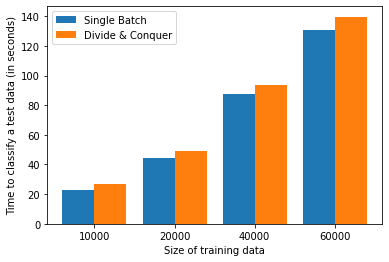

In [4]:
X_axis = np.arange(len(batch_sizes))
  
plt.bar(X_axis - 0.2, execution_time_batch, 0.4, label = 'Single Batch')
plt.bar(X_axis + 0.2, execution_time_split, 0.4, label = 'Divide & Conquer')
  
plt.xticks(X_axis, batch_sizes)
plt.xlabel("Size of training data")
plt.ylabel("Time to classify a test data (in seconds)")
plt.legend()
plt.show()